# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [3]:
df = pd.read_csv('CHURN_DADOS_TRATADOS.csv')
df.head()

,Unnamed: 0,ClienteID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,MetodoPagamento,Pagamento_Mensal,Total_Pago,Churn
0,0,7590-VHVEG,FEMININO,0,Sim,Não,1,DSL,Não,Não,Não,Month-to-month,ELECTRONIC CHECK,29.850000,29.85,0
1,1,5575-GNVDE,MASCULINO,0,Não,Não,34,DSL,Sim,Não,Não,One year,MAILED CHECK,56.950000,1889.50,0
2,2,3668-QPYBK,MASCULINO,0,Não,Não,2,DSL,Sim,Não,Não,Month-to-month,MAILED CHECK,53.850000,108.15,1
3,3,7795-CFOCW,MASCULINO,0,Não,Não,45,DSL,Sim,Sim,Não,One year,BANK TRANSFER (AUTOMATIC),65.607563,1840.75,0
4,16,8191-XWSZG,FEMININO,0,Não,Não,52,NÃO,No internet service,No internet service,No internet service,One year,MAILED CHECK,65.607563,1022.95,0


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [4]:
df.describe()

,Unnamed: 0,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago,Churn
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,1255.480707,0.161576,32.352090,65.607563,2290.087178,0.260048
std,718.401587,0.368135,24.636885,27.984700,2264.585643,0.438749
min,0.000000,0.000000,0.000000,18.400000,18.800000,0.000000
25%,633.750000,0.000000,8.000000,45.400000,402.337500,0.000000
50%,1255.500000,0.000000,29.000000,65.607563,1402.900000,0.000000
75%,1877.250000,0.000000,56.000000,87.712500,3867.162500,1.000000
max,2499.000000,1.000000,72.000000,118.650000,8564.750000,1.000000


A - É possível perceber que a maioria dos clientes não são idosos.
A média de tempo como cliente é de aproximadamente 32 meses, com o mínimo de 0 e o máximo de 72, o pagamento mensal tem a mediana igual a média, com o mínimo de 18,40 e o máximo de 118,65, o total pago varia de 18,80 a 8.564,75 e existe uma diferença entre a média e a mediana. Aproximidamente 26% dos clientes cancelaram o serviço.

B - Variavéis como total pago que tem a máximo tão discrepante da média e também uma diferença da mediana, é possível outlier. Pagamento mensal que tem o máximo de 118,65 pode ter uma possível má distruição em relação à média.


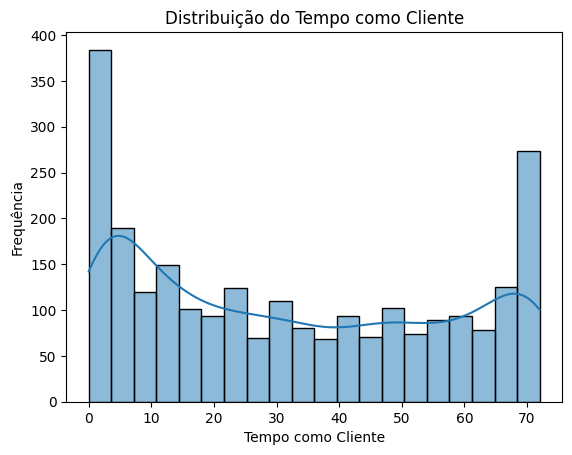

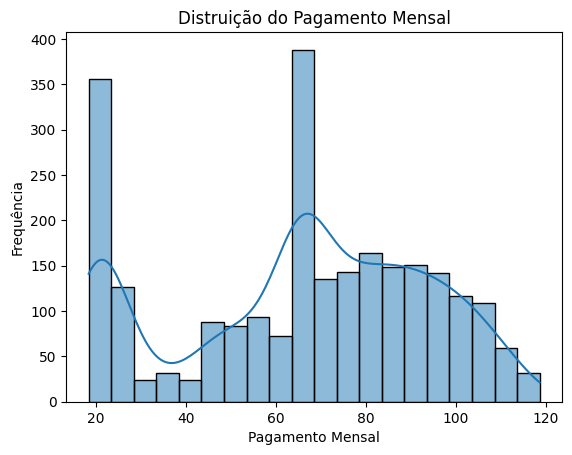

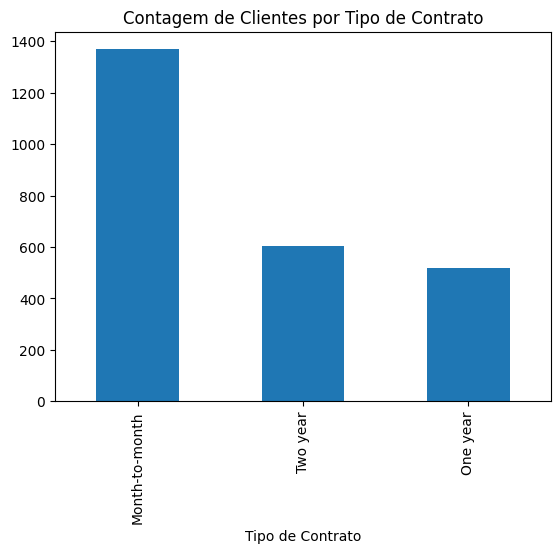

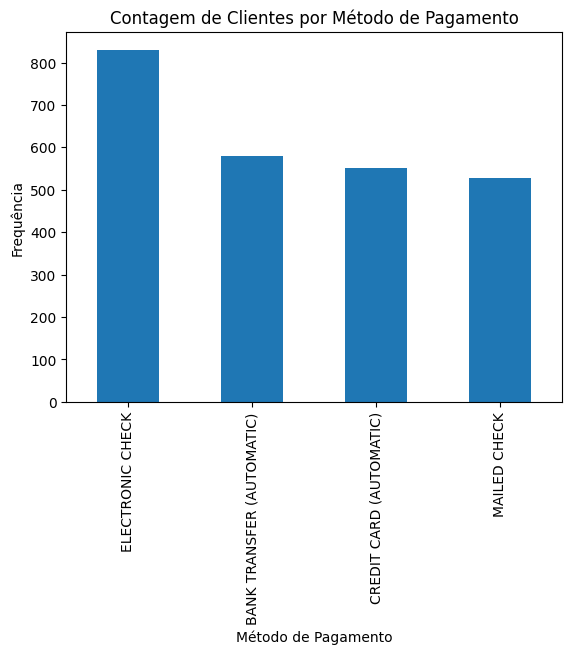

In [5]:
#C -
# Distribuição do Tempo como Cliente
sns.histplot(df['Tempo_como_Cliente'], bins=20, kde=True)
plt.title('Distribuição do Tempo como Cliente')
plt.xlabel('Tempo como Cliente')
plt.ylabel('Frequência')
plt.show()
# A densidade de clientes próximo a 40 meses cai quase o dobro em relação ao primeiro mês, isso fignifica que pode ser um desafio a retenção dos contratos ao longo do tempo.

# Distribuição do Pagamento Mensal
sns.histplot(df['Pagamento_Mensal'], bins=20, kde=True)
plt.title('Distruição do Pagamento Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Frequência')
plt.show()
# A densidade dos cliente aumentas em valores próximos de 20,00 , 80,00 - 75,00 e o maior 65,00. Isso pode representar os diferentes tipos de serviços.

# Contagem de cliente por Tipo de Contrato
contagem = df['Tipo_Contrato'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100
ax = contagem.plot(kind='bar')
plt.title('Contagem de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.show()
# O maioria dos clientes escolhes o pagamento mensal com maior flexibilidade.

# Contagem de clientes Método de Pagamento
contagem = df['MetodoPagamento'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100
ax = contagem.plot(kind='bar')
plt.title('Contagem de Clientes por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Frequência')
plt.show()
# O método mais escolhido é boleto digital, o que pode representar uma maior taxa de cancelamento.




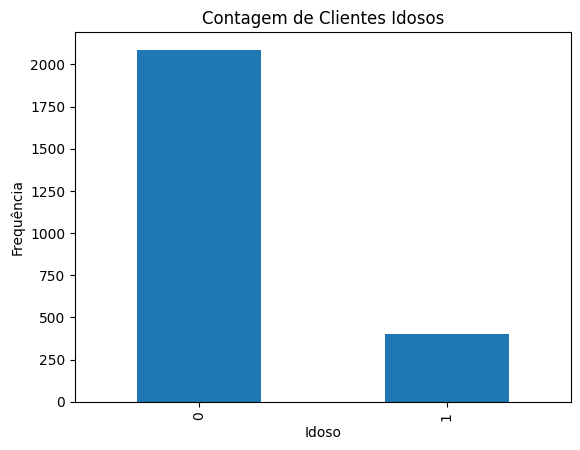

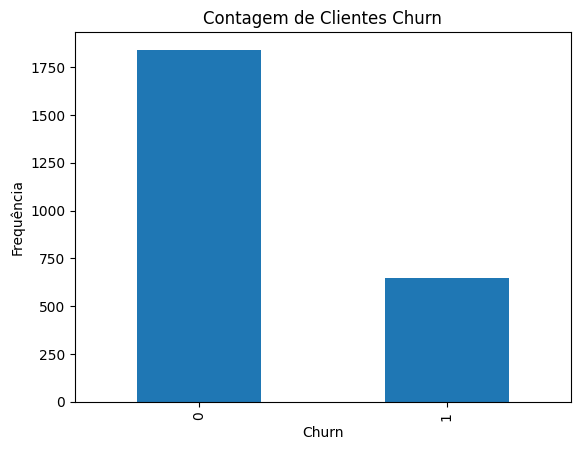

,count
Churn,
0,73.995177
1,26.004823


In [6]:
# D -

# Contagem de clientes Idosos
contagem_idoso = df['Idoso'].value_counts()
porcentagem_idoso = (contagem_idoso / contagem_idoso.sum()) * 100
ax = contagem_idoso.plot(kind='bar')
plt.title('Contagem de Clientes Idosos')
plt.xlabel('Idoso')
plt.ylabel('Frequência')
plt.show()

contagem_idoso = df['Idoso'].value_counts()
(contagem_idoso / contagem_idoso.sum()) * 100

# Apenas 16% dos clientes são idosos representando um desbalanciamento.


# Contagem de clientes Churn
contagem_churn = df['Churn'].value_counts()
porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100
ax = contagem_churn.plot(kind='bar')
plt.title('Contagem de Clientes Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')
plt.show()

contagem_churn = df['Churn'].value_counts()
(contagem_churn / contagem_churn.sum()) * 100

# Apenas 26% dos clientes cancelaram o serviço representando um desbalanciamento.





# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


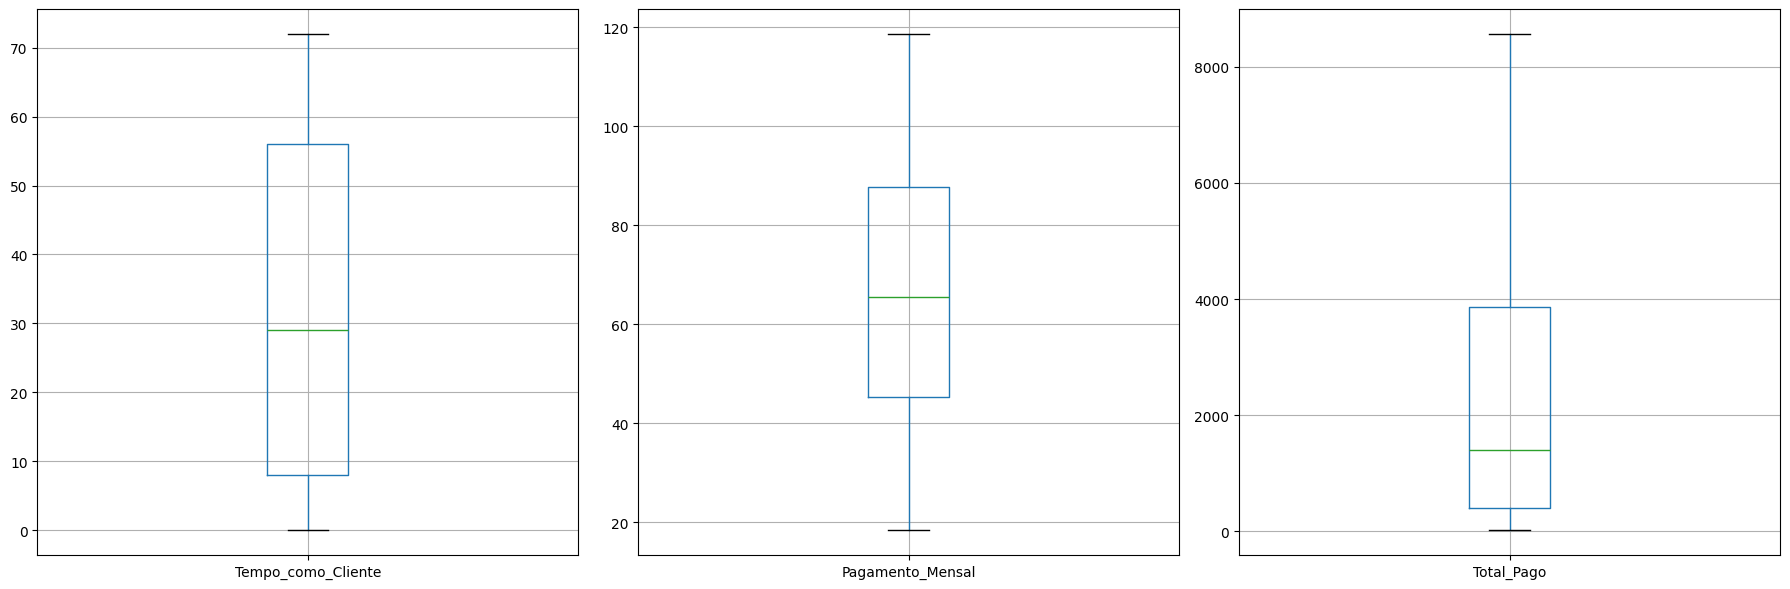

In [7]:
fig , axes = plt.subplots(1,3, figsize=(18,6))
df.boxplot(column='Tempo_como_Cliente', ax=axes[0])
df.boxplot(column='Pagamento_Mensal', ax=axes[1])
df.boxplot(column='Total_Pago', ax=axes[2])
plt.tight_layout()
plt.show()

In [8]:
# Identificar outliers com IQR
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Identificar outliers nas variáveis numéricas
outliers_tempo_como_cliente = detectar_outliers_iqr(df, 'Tempo_como_Cliente')
outliers_pagamento_mensal = detectar_outliers_iqr(df, 'Pagamento_Mensal')
outliers_total_pago = detectar_outliers_iqr(df, 'Total_Pago')

# Exibir quantidade de outliers identificados
len(outliers_tempo_como_cliente), len(outliers_pagamento_mensal), len(outliers_total_pago)

(0, 0, 0)

Segundo o critério do IQR nenhuma das variáveis contém outlier embora apresentado discrepâncias identificadas no df.describe()

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

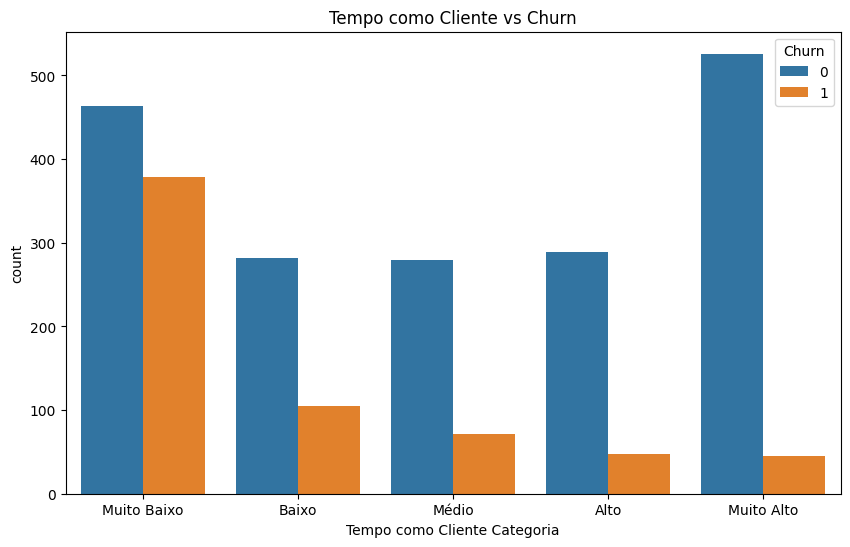

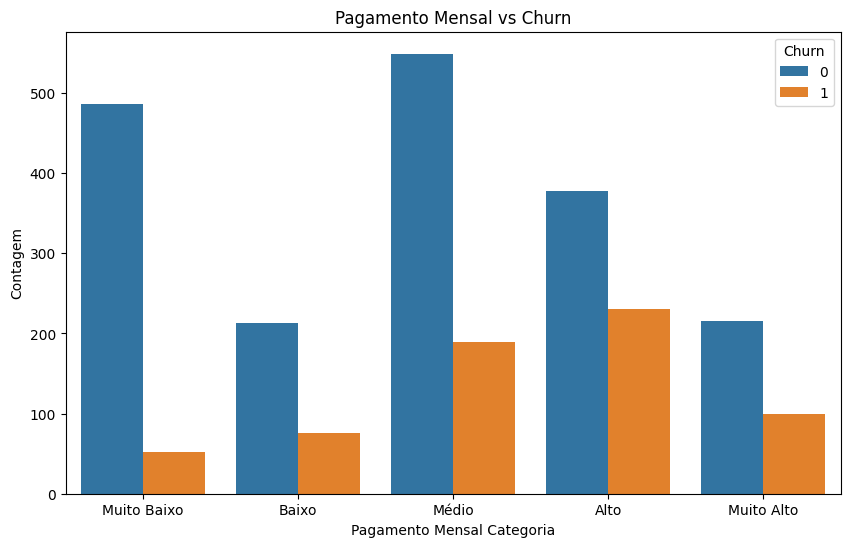

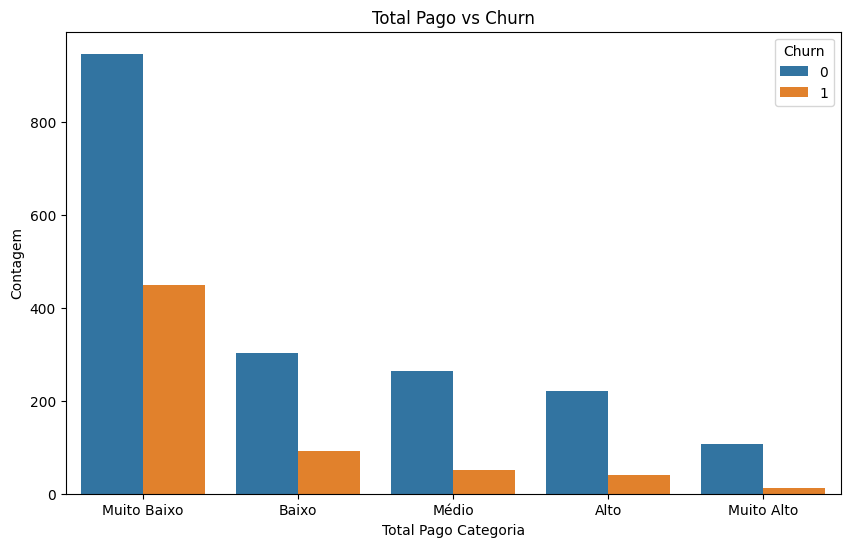

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

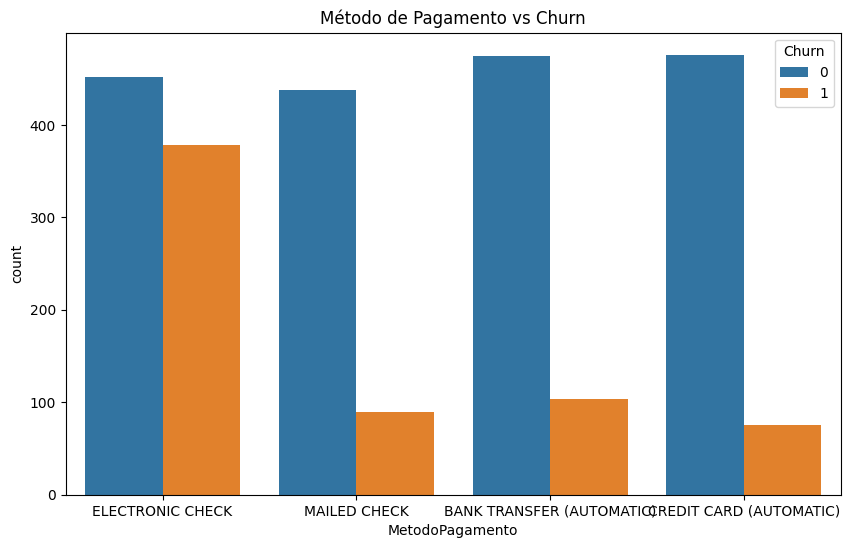

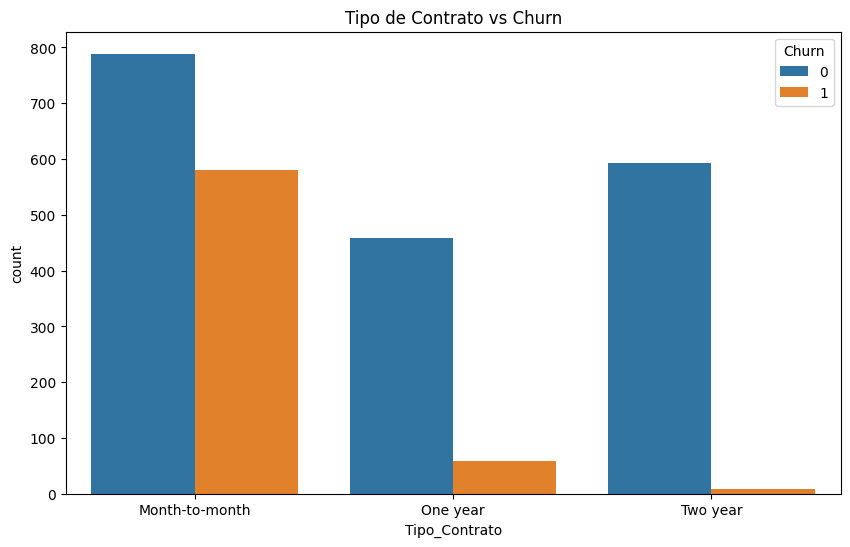

In [21]:
# A -

bins_labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
df['Tempo_como_Cliente_Categoria'] = pd.cut(df['Tempo_como_Cliente'], bins=5, labels=bins_labels)
df['Pagamento_Mensal_Categoria'] = pd.cut(df['Pagamento_Mensal'], bins=5, labels=bins_labels)
df['Total_Pago_Categoria'] = pd.cut(df['Total_Pago'], bins=5, labels=bins_labels)

# Tempo como Cliente vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Tempo_como_Cliente_Categoria', hue='Churn', data=df)
plt.title('Tempo como Cliente vs Churn')
plt.xlabel('Tempo como Cliente Categoria')

# Clientes que cancelam tendem a ter menos tempo contrato.


# Pagamento Mensal vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Pagamento_Mensal_Categoria', hue='Churn', data=df)
plt.title('Pagamento Mensal vs Churn')
plt.xlabel('Pagamento Mensal Categoria')
plt.ylabel('Contagem')
plt.show()

# Clientes que pagam valores mais altos tendem a ter menos tempo de contrato.

# Total Pago vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Pago_Categoria', hue='Churn', data=df)
plt.title('Total Pago vs Churn')
plt.xlabel('Total Pago Categoria')
plt.ylabel('Contagem')
plt.show()

# Clientes que pagaram menos no total são os que mais cancelam

# Método de Pagamento vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='MetodoPagamento', hue='Churn', data=df)
plt.title('Método de Pagamento vs Churn')
plt

# Contratos mensais possuem uma taxa de churn significativamente maior do que os contratos anuais.

# Tipo de Contrato vc Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo_Contrato', hue='Churn', data=df)
plt.title('Tipo de Contrato vs Churn')
plt.xlabel

# Clientes que usam 'boleto digital' tendem a ter uma taxa de churn mais alta em comparação aos outros métodos.

In [23]:
# B-
# Correlação entre as variáveis numéricas e o churn
correlacao = df[['Tempo_como_Cliente', 'Pagamento_Mensal', 'Total_Pago', 'Churn']].corr()
print(correlacao)


                    Tempo_como_Cliente  Pagamento_Mensal  Total_Pago     Churn
Tempo_como_Cliente            1.000000          0.218351    0.827170 -0.346532
Pagamento_Mensal              0.218351          1.000000    0.596733  0.204550
Total_Pago                    0.827170          0.596733    1.000000 -0.191351
Churn                        -0.346532          0.204550   -0.191351  1.000000


Tempo como Cliente (-0,34) - Quanto mais tempo o cliente tem, menos chance de churn
Pagamento Mensal (+0,20) - Pagamento mensais mais altos aumentam a chance de churn.
Pagamento Total (-0,19) - Cliente que pagaram mais ao longo do tempo têm menor probabilidade de cancelamento.
